# King County Eyaleti'nde Mayıs 2014 Mayıs 2015 Tarihleri Arasında Satılan Evlere Ait Verilerin İncelenmesi ve Satış Fiyatı Tahminlemesi

In [1]:
import pandas as pd
from scipy.stats import spearmanr
import numpy as np  
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from scipy import stats
%matplotlib inline
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels as sm

In [2]:
data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\modified_data.csv')

In [203]:
data

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,14,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,20,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,52,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,55,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,12,0,47.3684,-122.031,2390,7570


In [3]:
pd.options.display.max_columns=500

#Bu Veri seti kaggle.com'dan alınmıştır.Veri seti King County Eyaleti'nde Mayıs 2014 Mayıs 2015 tarihleri arasında satılan
evlere aittir.Bu çalışma 21 değişken 21613 gözlem içermektedir.Bağımsız değişken fiyattır.Geriye kalan 20 değişkenden ID,Tarih,
Postakodu bağımlı değişkenleri çıkarılmıştır.17 bağımlı değişken ile veri incelenmesine devam edilmiştir.

#King County Ev Puanlama Sistemi
#Value - Definition
#0 - Bilinmiyor
#1 - Tahta Kulübe
#2 - Yetersiz
#3 - Berbat
#4 - Düşük
#5 - Vasar
#6 - Ortalamadan düşük
#7 - Ortalama
#8 - İyi
#9 - Daha iyi 
#10 - Çok iyi
#11 - Mükemmel
#12 - Lüks
#13 - Çok büyük ve çok pahalı ev(Cambridge dictionary)
#20 - Olağanüstü Özellikler

#Fiyat,net metrekare,brüt metrekare,bina yaşı,net metrekare 2015,brüt metrekare 2015 sürekli değişkenlerdir.

#Banyo sayısı,yatak odası sayısı,kat sayısı,deniz manzarası,manzara durumu,ev durumu,ev puanı,
#tadilat durumu kesikli değişkenlerdir.

#pd.options.display.max_columns=500

#data.head()

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
#Veri setindeki ingilizce isimler türkçeleriyle değiştilmiştir.

#data_turkce_isimler =['fiyat','yatakodasi_sayisi','banyo_sayisi','net_m2','brut_m2','kat_sayisi','deniz_manzarasi',
#'manzara_durumu','ev_durumu','ev_puani','zemin_ustu_m2','zemin_alti_m2','ev_yasi','tadilat_durumu','enlem','boylam','net_m2_2015',
#'brut_m2_2015']
#data.columns = data_turkce_isimler

In [6]:
#Veri setinde yer alan binanın inşa yılı değişkeninde düzenleme yapılmıştır.Veri setinin 2015'e ait olması sebebiyle 
#2015'ten inşa yılının çıkarılmasıyla 2015 yılına ait bina yaşı bulunmuştur.

In [7]:
#bina_yasi = 2015 - data['ev_yasi']

#data['ev_yasi'] = bina_yasi

#data.head()

In [8]:
#Tadilat durumu değişkeninde tadilat olmayanlar 0 ile gösterildiği için tadilat olan yıllara da 1 atanarak
#tadilat var=1 tadilat yok=0 şeklinde değiştirilmiştir.

In [9]:
#for i in range(len(data)):
    #if data['tadilat_durumu'][i] != 0 :
        #data['tadilat_durumu'][i] = 1

for i in range(len(data)):
    if data["ev_yasi"][i]==0:
        data["ev_yasi"][i]=1

for i in range(len(data)):
    if data["zemin_alti_m2"][i]==0:
        data["zemin_alti_m2"][i]=1

for i in range(len(data)):
    if data['tadilat_durumu'][i] != 0 :
        data['tadilat_durumu'][i] = 1

In [10]:
data['manzara_durumu'] = pd.Categorical(data['manzara_durumu'],ordered=True)
data['ev_durumu'] = pd.Categorical(data['ev_durumu'],ordered=True)
data['tadilat_durumu'] = pd.Categorical(data['tadilat_durumu'])
data['deniz_manzarasi'] = pd.Categorical(data['deniz_manzarasi'])

In [11]:
#data.to_csv("modified_data.csv")

In [12]:
#İlk olarak sürekli değişkenlerin korelasyonu pearson korelasyon katsayısı ile incelenecektir.
#Korelasyon matrisinde simetriden dolayı matrisin tamamı yerine bir üçgeni göstermemiz yeterlidir.

In [13]:
surekli_deg=['fiyat','net_m2','brut_m2','zemin_ustu_m2','zemin_alti_m2','ev_yasi','net_m2_2015','brut_m2_2015']
x=data[['fiyat','net_m2','brut_m2','zemin_ustu_m2','zemin_alti_m2','ev_yasi','net_m2_2015','brut_m2_2015']]


In [14]:
cor_mat=np.corrcoef(x.T)
print("Korelasyon matrisinin sekli:", cor_mat.shape)

Korelasyon matrisinin sekli: (8, 8)


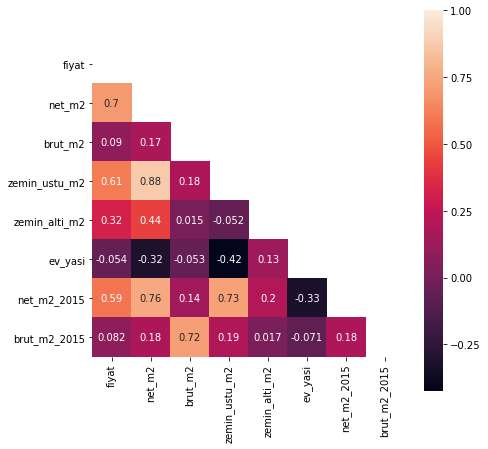

In [15]:
mask = np.zeros_like(cor_mat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7,7))
sns.heatmap(cor_mat,xticklabels=surekli_deg,yticklabels=surekli_deg,annot=True, fmt=".2g",mask=mask,square=True)
plt.show()

In [16]:
#Sürekli değişkenlerin korelasyonunu yorumla.

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


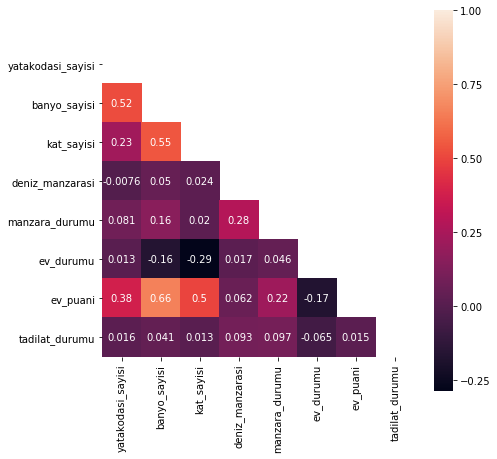

In [17]:
kesikli_deg=["yatakodasi_sayisi","banyo_sayisi","kat_sayisi","deniz_manzarasi","manzara_durumu","ev_durumu","ev_puani","tadilat_durumu"]
mat=data[["yatakodasi_sayisi","banyo_sayisi","kat_sayisi","deniz_manzarasi","manzara_durumu","ev_durumu","ev_puani","tadilat_durumu"]].as_matrix()
spearman_mat=scipy.stats.spearmanr(mat)
spearman_mat.correlation
mask = np.zeros_like(spearman_mat.correlation)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7,7))
sns.heatmap(spearman_mat.correlation,xticklabels=kesikli_deg,yticklabels=kesikli_deg,annot=True, fmt=".2g",mask=mask,square=True)
plt.show()

In [18]:
#Kesikli değişkenlerin korelasyonunu yorumla.

In [19]:
surekli_deg=data[['fiyat','net_m2','brut_m2','zemin_ustu_m2','zemin_alti_m2','ev_yasi','net_m2_2015','brut_m2_2015']]

In [20]:
data.sort_values('fiyat',ascending=False)

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
7252,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,105,1,47.6298,-122.323,3940,8800
3914,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,75,1,47.6500,-122.214,3930,25449
9254,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,14,0,47.6305,-122.240,4540,42730
4411,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,14,0,47.6289,-122.233,3560,24345
1448,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,6,0,47.6232,-122.220,4600,21750
1315,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,24,0,47.5631,-122.210,4320,24619
1164,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,16,0,47.6767,-122.211,3430,26788
8092,4668000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,32,1,47.5570,-122.210,3270,10454
2626,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,11,0,47.7493,-122.280,3030,23408
8638,4489000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,14,0,47.6208,-122.219,3720,14592


In [21]:
data[data['fiyat']==data['fiyat'].max()]

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
7252,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,105,1,47.6298,-122.323,3940,8800


In [22]:
data[data['fiyat']==data['fiyat'].min()]

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
1149,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,49,0,47.2638,-121.906,1160,42882


In [23]:
log_surekli=np.log(surekli_deg+1)
log_surekli

,fiyat,net_m2,brut_m2,zemin_ustu_m2,zemin_alti_m2,ev_yasi,net_m2_2015,brut_m2_2015
0,12.309987,7.074117,8.639588,7.074117,0.000000,4.110874,7.201171,8.639588
1,13.195616,7.852050,8.887791,7.682943,5.993961,4.174387,7.433075,8.941153
2,12.100718,6.647688,9.210440,6.647688,0.000000,4.418841,7.908755,8.995041
3,13.311331,7.581210,8.517393,6.957497,6.814543,3.931826,7.215975,8.517393
4,13.142168,7.427144,8.997271,7.427144,0.000000,3.367296,7.496097,8.923191
5,14.018452,8.598036,11.532051,8.266421,7.333676,2.708050,8.468213,11.532051
6,12.458779,7.447751,8.827615,7.447751,0.000000,3.044522,7.713785,8.827615
7,12.583999,6.966967,9.181118,6.966967,0.000000,3.970292,7.409136,9.181118
8,12.343663,7.484930,8.918784,6.957497,6.594413,4.025352,7.484930,9.001346
9,12.685411,7.544861,8.788898,7.544861,0.000000,2.564949,7.779467,8.932080


In [24]:
log_surekli["zemin_alti_m2"] = log_surekli["zemin_alti_m2"].replace(0, pd.np.nan).dropna(axis=0, how='any').fillna(0).astype(int)

C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


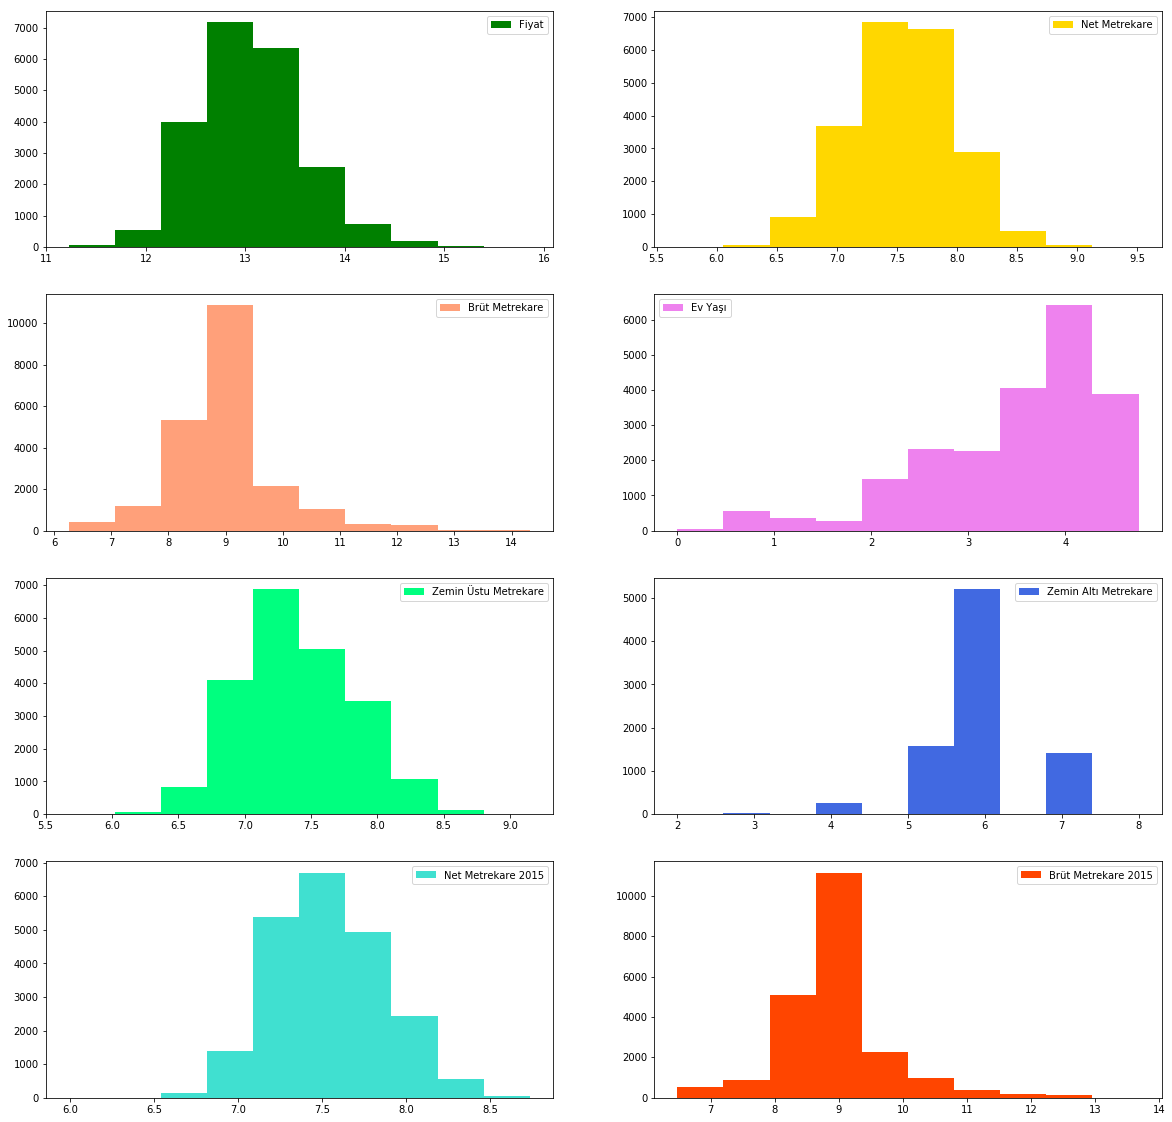

In [25]:
plt.figure(figsize=(20,20))
plt.subplot(4,2,1)
plt.hist(log_surekli['fiyat'],label="Fiyat",color='g')
plt.legend()
plt.subplot(4,2,2)
plt.hist(log_surekli['net_m2'],label="Net Metrekare",color='gold')
plt.legend()
plt.subplot(4,2,3)
plt.hist(log_surekli['brut_m2'],label='Brüt Metrekare',color='lightsalmon')
plt.legend()
plt.subplot(4,2,4)
plt.hist(log_surekli['ev_yasi'],label='Ev Yaşı',color='violet')
plt.legend()
plt.subplot(4,2,5)
plt.hist(log_surekli['zemin_ustu_m2'],label='Zemin Üstu Metrekare',color='springgreen')
plt.legend()
plt.subplot(4,2,6)
plt.hist(log_surekli['zemin_alti_m2'],label='Zemin Altı Metrekare',color='royalblue')
plt.legend()
plt.subplot(4,2,7)
plt.hist(log_surekli['net_m2_2015'],label='Net Metrekare 2015',color='turquoise')
plt.legend()
plt.subplot(4,2,8)
plt.hist(log_surekli['brut_m2_2015'],label='Brüt Metrekare 2015',color='orangered')
plt.legend()
plt.show()

In [26]:
data[data['yatakodasi_sayisi']==data['yatakodasi_sayisi'].max()]

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,68,0,47.6878,-122.331,1330,4700


In [27]:
#Veri setinde kayıp veri varlığını kontrol etmek için kontrol yapıldı.

In [28]:
data.isnull().values.any()

False

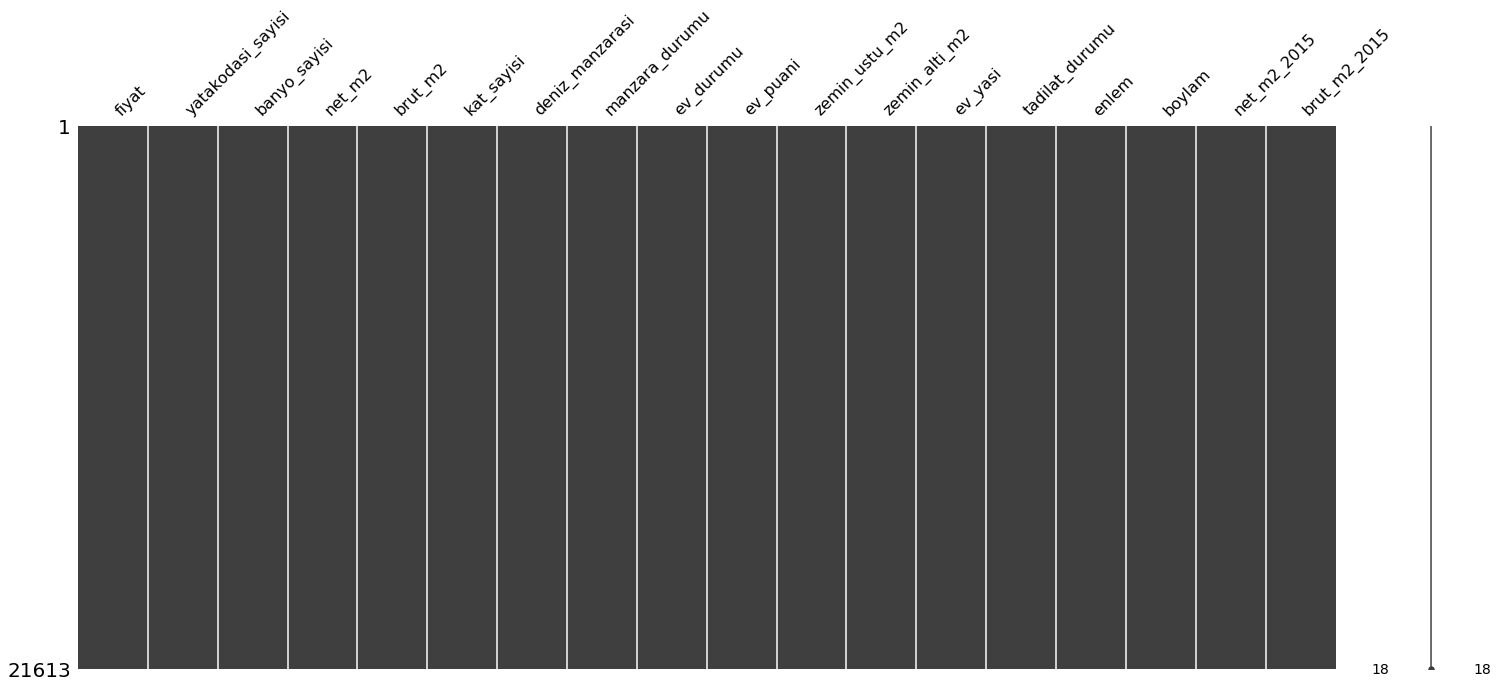

In [29]:
msno.matrix(data)

In [30]:
desc=pd.DataFrame(data.describe().T)

In [31]:
desc

,count,mean,std,min,25%,50%,75%,max
fiyat,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
yatakodasi_sayisi,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
banyo_sayisi,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
net_m2,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
brut_m2,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
kat_sayisi,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
ev_puani,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
zemin_ustu_m2,21613.0,1788.390691,828.090978,290.0000,1190.000,1560.0000,2210.000,9.410000e+03
zemin_alti_m2,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03
ev_yasi,21613.0,43.994864,29.373411,0.0000,18.000,40.0000,64.000,1.150000e+02


In [32]:
#Veri setinde inceleme yapıldığında yatak odası sayısının ortalama 3,37 yani yaklaşık olarak 3 olduğunu ve standart sapmasının 
#0,93'tür.Minimum değerin 0,maksimum değerin 33 olduğunu görürüz.Banyo sayısının ortalamasının 2,11 yani yaklaşık 2,standart sapması 
#0,77'dir.En küçük değer 0,en yüksek değer ise 8'dir.Net m2 ortalamasının 2079 m2,standart sapmasının ise 918 olduğu görülmektedir.
#En küçük değer 290,en büyük değer ise 13540 m2'dir.Brüt m2 ?????
#Kat sayısı ortalama 1,49 standart sapması 0,53'tür.En düşük kat sayısı 1,en yüksek kat sayısı 3,50'tur.Ev puanı ortalama 7,65,
#standart sapmaı 1,17,en düşük ev puanı 1,en yüksek ev puanı ise 13'tür.Zemin üstü m2 ortalama 1788,39,standart sapma 828,09
#en düşük 290,en yüksek 9410'dur.Zemin altı m2 ortalaması 291,50,standart sapması 442,57'dir.En düşük 0,en yüksek 4820 m2'dir.
#Ev yaşı ortalama yaklaşık 44,standart sapması ise 29,37'dir.En düşük bina yaşı 0,en yüksek 115'tir.
#Net m2 2015 değişkeninin ortalaması 1986,55,standart sapması ise 685'tir.2015 yılına ait en düşük m2 399,en yüksek m2 6210'dur.
#Brüt m2 2015 değişkeninin ortalaması 12768,standart sapması ise 27304'tür.2015 yılına ait en düşük m2 651,en yüksek m2 ise 871200 
#m2'dir.

In [33]:
#Veri setindeki sürekli değişkenlerin normalliği Shapiro-Wilk Testi ile incelendi.Bu incelemeye göre aşağıdaki hipotezler kurulur;
#H0:Değişkenler normal dağılıma uygundur.
#H1:Değişkenler normal dağılıma uygun değildir.
#Bu hipotezlere göre alfa değerleri 0,05 ile kıyaslandığında tümünün p değerlerinin 0,05'ten küçük olduğu görülmektedir.Buna göre
#H0 hipotezleri reddedilir ve veri setinin normal dağılıma uygun olmadığı görülmektedir.

In [34]:
surekli_deg=data[['fiyat','net_m2','brut_m2','zemin_ustu_m2','zemin_alti_m2','ev_yasi','net_m2_2015','brut_m2_2015']]

In [35]:
for column in surekli_deg.columns:
    print(column)
    print(scipy.stats.shapiro(surekli_deg[column]))

fiyat
(0.7120139598846436, 0.0)
net_m2
(0.9149821400642395, 0.0)
brut_m2
(0.23291927576065063, 0.0)
zemin_ustu_m2
(0.8936538100242615, 0.0)
zemin_alti_m2
(0.7097305059432983, 0.0)
ev_yasi
(0.954443633556366, 0.0)
net_m2_2015
(0.9319114089012146, 0.0)
brut_m2_2015
(0.28693175315856934, 0.0)


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\s

In [36]:
log_surekli=np.log(surekli_deg+1)
log_surekli

,fiyat,net_m2,brut_m2,zemin_ustu_m2,zemin_alti_m2,ev_yasi,net_m2_2015,brut_m2_2015
0,12.309987,7.074117,8.639588,7.074117,0.000000,4.110874,7.201171,8.639588
1,13.195616,7.852050,8.887791,7.682943,5.993961,4.174387,7.433075,8.941153
2,12.100718,6.647688,9.210440,6.647688,0.000000,4.418841,7.908755,8.995041
3,13.311331,7.581210,8.517393,6.957497,6.814543,3.931826,7.215975,8.517393
4,13.142168,7.427144,8.997271,7.427144,0.000000,3.367296,7.496097,8.923191
5,14.018452,8.598036,11.532051,8.266421,7.333676,2.708050,8.468213,11.532051
6,12.458779,7.447751,8.827615,7.447751,0.000000,3.044522,7.713785,8.827615
7,12.583999,6.966967,9.181118,6.966967,0.000000,3.970292,7.409136,9.181118
8,12.343663,7.484930,8.918784,6.957497,6.594413,4.025352,7.484930,9.001346
9,12.685411,7.544861,8.788898,7.544861,0.000000,2.564949,7.779467,8.932080


In [193]:
log_wout=np.log(wout+1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [194]:
log_wout

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
0,12.309987,1.386294,0.693147,7.074117,8.639588,0.693147,0.0,0.000000,1.386294,2.079442,7.074117,0.000000,4.110874,0.000000,3.881795,NaN,7.201171,8.639588
1,13.195616,1.386294,1.178655,7.852050,8.887791,1.098612,0.0,0.000000,1.386294,2.079442,7.682943,5.993961,4.174387,0.693147,3.886110,NaN,7.433075,8.941153
2,12.100718,1.098612,0.693147,6.647688,9.210440,0.693147,0.0,0.000000,1.386294,1.945910,6.647688,0.000000,4.418841,0.000000,3.886457,NaN,7.908755,8.995041
3,13.311331,1.609438,1.386294,7.581210,8.517393,0.693147,0.0,0.000000,1.791759,2.079442,6.957497,6.814543,3.931826,0.000000,3.881993,NaN,7.215975,8.517393
4,13.142168,1.386294,1.098612,7.427144,8.997271,0.693147,0.0,0.000000,1.386294,2.197225,7.427144,0.000000,3.367296,0.000000,3.883969,NaN,7.496097,8.923191
5,14.018452,1.609438,1.704748,8.598036,11.532051,0.693147,0.0,0.000000,1.386294,2.484907,8.266421,7.333676,2.708050,0.000000,3.884777,NaN,8.468213,11.532051
6,12.458779,1.386294,1.178655,7.447751,8.827615,1.098612,0.0,0.000000,1.386294,2.079442,7.447751,0.000000,3.044522,0.000000,3.877632,NaN,7.713785,8.827615
7,12.583999,1.386294,0.916291,6.966967,9.181118,0.693147,0.0,0.000000,1.386294,2.079442,6.966967,0.000000,3.970292,0.000000,3.879696,NaN,7.409136,9.181118
8,12.343663,1.386294,0.693147,7.484930,8.918784,0.693147,0.0,0.000000,1.386294,2.079442,6.957497,6.594413,4.025352,0.000000,3.881817,NaN,7.484930,9.001346
9,12.685411,1.386294,1.252763,7.544861,8.788898,1.098612,0.0,0.000000,1.386294,2.079442,7.544861,0.000000,2.564949,0.000000,3.878847,NaN,7.779467,8.932080


In [37]:
for column in log_surekli.columns:
    print(column)
    print(scipy.stats.shapiro(log_surekli[column]))

fiyat
(0.9891963601112366, 6.069350992312049e-37)
net_m2
(0.9994391202926636, 2.400412768110982e-06)
brut_m2
(0.9175819158554077, 0.0)
zemin_ustu_m2
(0.99169921875, 4.403562733969558e-33)
zemin_alti_m2
(0.6710091829299927, 0.0)
ev_yasi
(0.9084532856941223, 0.0)
net_m2_2015
(0.9952976703643799, 1.6237870964833717e-25)
brut_m2_2015
(0.9099339246749878, 0.0)


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\s

In [38]:
latlon=data[["enlem","boylam"]].as_matrix()
latlon

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[  47.5112, -122.257 ],
       [  47.721 , -122.319 ],
       [  47.7379, -122.233 ],
       ...,
       [  47.5944, -122.299 ],
       [  47.5345, -122.069 ],
       [  47.5941, -122.299 ]])

In [39]:
m=folium.Map(location=[47.4700,-121.8400])
m.add_child(HeatMap(latlon,radius=15))
m

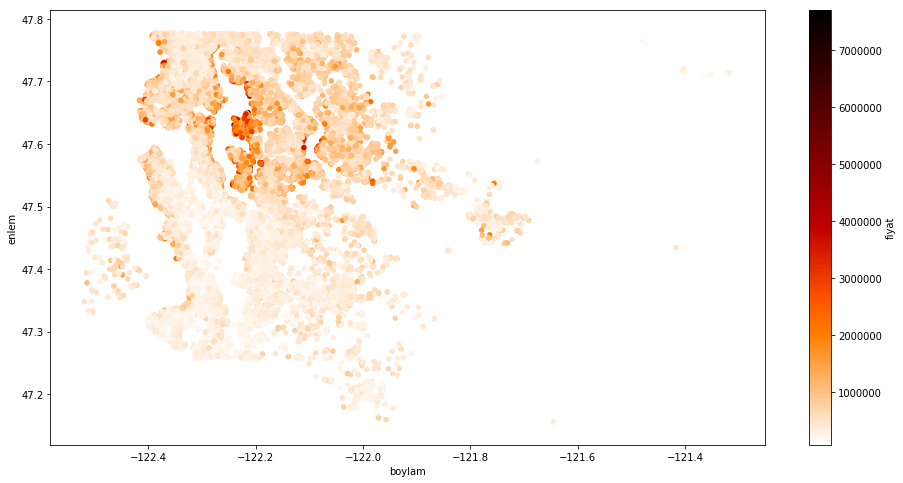

In [40]:
data.plot(kind="scatter", x="boylam", y="enlem", figsize=(16, 8), c="fiyat", 
             cmap="gist_heat_r", colorbar=True, sharex=False);
plt.show();

In [202]:

from folium.plugins import HeatMap

max_val = data.fiyat.max()

lat = np.array(data.enlem, dtype=pd.Series)
lon = np.array(data.boylam, dtype=pd.Series)
mag = np.array(data.fiyat, dtype=pd.Series)

d = np.dstack((lat, lon, mag))[0]
heatmap_data = [i for i in d.tolist()]

m = folium.Map(location=[47.35, -121.9], zoom_start=9, detect_retina=True, control_scale=False)
HeatMap(heatmap_data, radius=1, blur=1).add_to(m)
m

In [41]:
data['ev_yas_kategori'] = data['ev_yasi'].apply(lambda x: ('Eski' if x >= 45 else 'Orta Yaş') if x >= 25 else 'Yeni')
data['ev_yas_kategori'] = pd.Categorical(data['ev_yas_kategori'], categories = ['Eski', 'Orta Yaş', 'Yeni'])
data.head(n=5)


,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015,ev_yas_kategori
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0,47.5112,-122.257,1340,5650,Eski
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,1,47.7210,-122.319,1690,7639,Eski
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,47.7379,-122.233,2720,8062,Eski
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0,47.5208,-122.393,1360,5000,Eski
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,47.6168,-122.045,1800,7503,Orta Yaş


In [172]:
fvalue, pvalue = stats.f_oneway(eski,orta,yeni)
print(fvalue, pvalue)

309.63884300787396 2.6081834515283393e-133


# Hipotez Testleri

In [42]:
#Ev yaşı kategorilerini fiyat açısından test etme (Kruskal-Wallis Testi)/Post Hoc'u Mann Whitney ile yap

In [43]:
groups = data.groupby("ev_yas_kategori").groups
eski = log_surekli.fiyat[groups["Eski"]]
yeni = log_surekli.fiyat[groups['Yeni']]
orta=log_surekli.fiyat[groups['Orta Yaş']]
anova_array=np.array([eski,orta,yeni])

In [44]:
scipy.stats.f_oneway(eski,orta,yeni)

F_onewayResult(statistic=309.63884300787396, pvalue=2.6081834515283393e-133)

In [45]:
scipy.stats.shapiro(eski)


C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.992723286151886, 2.3064245616841156e-22)

In [46]:
scipy.stats.shapiro(orta)


(0.9871159195899963, 1.963187329656881e-20)

In [47]:
scipy.stats.shapiro(yeni)

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9680176377296448, 4.324591269997312e-36)

In [48]:
kw_array=list([scipy.stats.shapiro(eski),scipy.stats.shapiro(orta),scipy.stats.shapiro(yeni)])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [49]:

kw_nr=pd.DataFrame(kw_array,columns=["Test İstatistiği","P Değeri"],index=["Eski","Orta Yaş","Yeni"])
kw_nr

,Test İstatistiği,P Değeri
Eski,0.992723,2.306425e-22
Orta Yaş,0.987116,1.963187e-20
Yeni,0.968018,4.324591e-36


In [50]:
#p değeri (0,00) 0,05'ten küçük olduğu için normal dağılım göstermediği gözlemlenir.Ve bu yüzden Kruskal-Wallis testi kullanılır.

In [51]:
#H0:Ev yaş grupları ortalamaları arasındaki fark istatistiksel olarak anlamlı değildir.
#H1:Ev yaş grupları ortalamaları arasındaki istatistiksel olarak fark anlamlıdır.

In [52]:
stat_kruskal,p_kruskal=scipy.stats.kruskal(eski,orta,yeni)

In [53]:
test= {'Test İstatistiği': [stat_kruskal], 
        'P Değeri': [p_kruskal]}
result = pd.DataFrame(test)
result


,Test İstatistiği,P Değeri
0,546.297258,2.360792e-119


In [54]:
#p value=1,31-137 <0,05 olduğu için H0 reddedilir.Yani ev yaş grupları arasındaki fark istatistiksel olarak anlamlıdır.

In [55]:
stats.mannwhitneyu(eski,orta)

MannwhitneyuResult(statistic=22912336.5, pvalue=6.923085661349949e-08)

In [56]:
stats.mannwhitneyu(eski,yeni)

MannwhitneyuResult(statistic=26917137.0, pvalue=3.3163285003196907e-116)

In [57]:
stats.mannwhitneyu(orta,yeni)

MannwhitneyuResult(statistic=13267837.0, pvalue=4.4010662681426914e-51)

In [58]:
mw_list=list([stats.mannwhitneyu(eski,orta),stats.mannwhitneyu(eski,yeni),stats.mannwhitneyu(orta,yeni)])

Mann Whitney ile hangi yaş grubunun farklılık yarattığına bakacak olduğumuzda tüm ev yaş gruplarının p değerlerinin 0,05'ten küçük olduğu ve bu yüzden farklılığa katkısı olduğu görülür.

In [59]:
mw_evyas=pd.DataFrame(mw_list,columns=["Test İstatistiği","P Değeri"],index=["Eski-Orta Yaş","Eski-Yeni","Orta Yaş-Yeni"])

In [60]:
mw_evyas

,Test İstatistiği,P Değeri
Eski-Orta Yaş,22912336.5,6.923086e-08
Eski-Yeni,26917137.0,3.316329e-116
Orta Yaş-Yeni,13267837.0,4.401066e-51


# Ki kare testi ile tadilat durumu ile ev yaş grupları arasındaki ilişkiyi test etmek?

In [61]:
tadilat_yas=data[["tadilat_durumu","ev_yas_kategori"]]
tadilat_yas.head()

,tadilat_durumu,ev_yas_kategori
0,0,Eski
1,1,Eski
2,0,Eski
3,0,Eski
4,0,Orta Yaş


In [62]:
tab=pd.crosstab(tadilat_yas['tadilat_durumu'],tadilat_yas['ev_yas_kategori'],margins=True)
tab

ev_yas_kategori,Eski,Orta Yaş,Yeni,All
tadilat_durumu,,,,
0,9346,4682,6671,20699
1,835,73,6,914
All,10181,4755,6677,21613


In [63]:
#H0:Tadilat durumu,bina yaşı ile ilişkili değildir.
#H1:Tadilat durumu,bina yaşı ile ilişkilidir.

In [64]:
ki_kare=np.array([tab.iloc[0][0:3].values,tab.iloc[1][0:3].values])
ki_kare

array([[9346, 4682, 6671],
       [ 835,   73,    6]], dtype=int64)

In [65]:

stats.chi2_contingency(ki_kare)[0:3]

(764.3418272508791, 1.0599394793827284e-166, 2)

In [66]:
#Hesaplanan ki kare değeri 1017,serbestlik derecesi 2,p-value=1,059 üzeri eksi 166 0,05'ten küçük olduğu için H0 reddedilir.
#Yani tadilat durumunun bina yaşı ile ilişkili olduğu söylenebilir.

# Manzara Durumu-Fiyat İncelemesi

H0:Ev satuş fiyat ortalamaları arasında manzaranın durumu açısından fark olduğu söylenemez.

H1:Ev satuş fiyat ortalamaları arasında manzaranın durumu açısından fark olduğu söylenebilir.

In [195]:
stat_md, p_md =scipy.stats.kruskal(log_wout[data["manzara_durumu"] == 0]["fiyat"],
                        log_wout[data["manzara_durumu"] == 1]["fiyat"],
                        log_wout[data["manzara_durumu"] == 2]["fiyat"],
                        log_wout[data["manzara_durumu"] == 3]["fiyat"],
                        log_wout[data["manzara_durumu"] == 4]["fiyat"])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [68]:
kw_sonuc= {'Test İstatistiği': [stat_md], 
        'P Değeri': [p_md]}
result = pd.DataFrame(kw_sonuc)
result

,Test İstatistiği,P Değeri
0,1937.978284,0.0


p =0.0 <0.5 H0 red gruplar arası fark  var hangi grubun fark yarattığını bulmak için mann whitney testi yap.

In [69]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 1]["fiyat"])

MannwhitneyuResult(statistic=1638543.5, pvalue=4.1405945042952345e-54)

In [70]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 2]["fiyat"])

MannwhitneyuResult(statistic=4929795.0, pvalue=3.353210541717555e-137)

In [71]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"])

MannwhitneyuResult(statistic=1903004.5, pvalue=8.787073320694941e-126)

In [72]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"])

MannwhitneyuResult(statistic=546192.5, pvalue=1.90295697506501e-141)

In [73]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],log_surekli[data["manzara_durumu"] == 2]["fiyat"])

MannwhitneyuResult(statistic=157024.5, pvalue=0.31486033368457794)

In [74]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"])

MannwhitneyuResult(statistic=68777.0, pvalue=2.06066864237933e-06)

In [75]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],data[data["manzara_durumu"] == 4]["fiyat"])

MannwhitneyuResult(statistic=0.0, pvalue=2.7542091109140597e-108)

In [76]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 2]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"])

MannwhitneyuResult(statistic=194895.0, pvalue=3.4301367265332006e-11)

In [77]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 2]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"])

MannwhitneyuResult(statistic=69901.0, pvalue=1.3182914878047303e-48)

In [78]:
scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 3]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"])

MannwhitneyuResult(statistic=51935.0, pvalue=9.155204667486674e-19)

In [79]:
md_list=list([scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 1]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 2]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 0]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],log_surekli[data["manzara_durumu"] == 2]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"]),
              scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 1]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 2]["fiyat"],log_surekli[data["manzara_durumu"] == 3]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 2]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"]),
             scipy.stats.mannwhitneyu(log_surekli[data["manzara_durumu"] == 3]["fiyat"],log_surekli[data["manzara_durumu"] == 4]["fiyat"])])

In [80]:
md_mann=pd.DataFrame(md_list,columns=["Test İstatistiği","P Değeri"],index=["Çok Kötü-Kötü","Çok Kötü-Orta","Çok Kötü-İyi","Çok Kötü-Çok İyi","Kötü-Orta","Kötü-İyi","Kötü-Çok İyi","Orta-İyi","Orta-Çok İyi","İyi-Çok İyi"])

In [81]:
md_mann

,Test İstatistiği,P Değeri
Çok Kötü-Kötü,1638543.5,4.140595e-54
Çok Kötü-Orta,4929795.0,3.353211e-137
Çok Kötü-İyi,1903004.5,8.787073e-126
Çok Kötü-Çok İyi,546192.5,1.902957e-141
Kötü-Orta,157024.5,3.148603e-01
Kötü-İyi,68777.0,2.060669e-06
Kötü-Çok İyi,24769.0,3.555042e-32
Orta-İyi,194895.0,3.430137e-11
Orta-Çok İyi,69901.0,1.318291e-48
İyi-Çok İyi,51935.0,9.155205e-19


Farklılık yaratan grubu bulmak için mann whitney testi yapıldığında tüm grupların birbirinden farklı olduğu sadece 1=kötü ve 2=orta olan grupların birbirinden farklı olmadığı sonucuna ulaşılmıştır.

Yazarken ilk burası yazılacak normallik testi yapıldı

In [82]:
scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 0]["fiyat"])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9950664043426514, 5.973546159830367e-25)

In [83]:
scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 1]["fiyat"])

(0.9843431711196899, 0.0011297303717583418)

In [84]:
scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 2]["fiyat"])

(0.9920634627342224, 4.8633632104611024e-05)

In [85]:
scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 3]["fiyat"])

(0.9932916760444641, 0.022690637037158012)

In [86]:
scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 4]["fiyat"])

(0.9959393739700317, 0.5842751264572144)

In [87]:
md_normal=list([scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 0]["fiyat"]),
               scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 1]["fiyat"]),
               scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 2]["fiyat"]),
                scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 3]["fiyat"]),
                scipy.stats.shapiro(log_surekli[data["manzara_durumu"] == 4]["fiyat"])])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [88]:
md_nrml=pd.DataFrame(md_normal,columns=["Test İstatistiği","P Değeri"],index=["Çok Kötü","Kötü","Orta","İyi","Çok İyi"])

In [89]:
md_nrml

,Test İstatistiği,P Değeri
Çok Kötü,0.995066,5.973546e-25
Kötü,0.984343,1.129730e-03
Orta,0.992063,4.863363e-05
İyi,0.993292,2.269064e-02
Çok İyi,0.995939,5.842751e-01


# Deniz Manzarası-Fiyat İncelemesi

H0:Deniz manzarasının olduğu evlerin satış fiyatının normal dağıldığı söylenebilir.
H1:Deniz manzarasının olduğu evlerin satış fiyatının normal dağıldığı söylenemez.


In [90]:
scipy.stats.shapiro(log_surekli[data["deniz_manzarasi"] == 0]["fiyat"])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9920880198478699, 2.630235907016453e-32)

In [91]:
scipy.stats.shapiro(log_surekli[data["deniz_manzarasi"] == 1]["fiyat"])

(0.9850592017173767, 0.07756178826093674)

In [92]:
df_nrml=list([scipy.stats.shapiro(log_surekli[data["deniz_manzarasi"] == 0]["fiyat"]),
              scipy.stats.shapiro(log_surekli[data["deniz_manzarasi"] == 1]["fiyat"])])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [93]:
df_nrml=pd.DataFrame(df_nrml,columns=["Test İstatistiği","P Değeri"],index=["Deniz Manzarası Yok","Deniz Manzarası Var"])
df_nrml

,Test İstatistiği,P Değeri
Deniz Manzarası Yok,0.992088,2.630236e-32
Deniz Manzarası Var,0.985059,7.756179e-02


p değerlerinin 0,05'ten küçük olması sebebiyle H0 hipotezi reddedilir.Ve deniz manzarasına göre ev satış fiyatlarının normal dağıldığı söylenemez.Bu sebeple bağımsız t testinin parametrik olmayan testlerdeki karşılığı olan mann whitney testi uygulanır.

In [94]:
stat_dm, p_dm = scipy.stats.mannwhitneyu(log_surekli[data["deniz_manzarasi"] == 0]["fiyat"],
                        log_surekli[data["deniz_manzarasi"] == 1]["fiyat"])

In [95]:
mw_sonuc = {'Test İstatistiği': [stat_dm], 
        'P Değeri': [p_dm]}
result = pd.DataFrame(mw_sonuc)
result

,Test İstatistiği,P Değeri
0,405519.0,1.621521e-64


p değeri 0,05'ten küçük çıktığı için H0 hipotezi reddedilir ve bu nedenle deniz manzarasına sahip olan evler ile olmayan evlerin ortalama satış fiyatları arasında bir fark olmadığı söylenebilir.

# Tadilat Durumu-Fiyat İlişkisi İnceleme

In [96]:
scipy.stats.shapiro(log_surekli[data["tadilat_durumu"] == 0]["fiyat"])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9899331331253052, 2.6832856869707994e-35)

In [97]:
scipy.stats.shapiro(log_surekli[data["tadilat_durumu"] == 1]["fiyat"])

(0.9941367506980896, 0.0012447605840861797)

In [98]:
stat_td, p_td = scipy.stats.mannwhitneyu(log_surekli[data["tadilat_durumu"] == 0]["fiyat"],log_surekli[data["tadilat_durumu"] == 1]["fiyat"])

In [99]:
td_list=list([scipy.stats.shapiro(log_surekli[data["tadilat_durumu"] == 0]["fiyat"]),scipy.stats.shapiro(log_surekli[data["tadilat_durumu"] == 1]["fiyat"])])

C:\Users\lenovo\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [100]:
td_nrml=pd.DataFrame(td_list,columns=["Test İstatistiği","P Değeri"],index=["Tadilat Yapılmış","Tadilat Yapılmamış"])

In [101]:
td_nrml

,Test İstatistiği,P Değeri
Tadilat Yapılmış,0.989933,2.683286e-35
Tadilat Yapılmamış,0.994137,1.244761e-03


In [102]:
td_sonuc = {'Test İstatistiği': [stat_td], 
        'P Değeri': [p_td]}
result = pd.DataFrame(td_sonuc)
result

,Test İstatistiği,P Değeri
0,6717839.5,3.381541e-50


-------------------------------------------------------------------


In [103]:
data.drop(['ev_yas_kategori'],axis=1,inplace=True)

In [104]:
from sklearn import preprocessing
#norm=preprocessing.normalize(data)
#norm_data=pd.DataFrame(norm)
#norm_data.columns=data_turkce_isimler
#norm.data

In [105]:

from sklearn.linear_model import LinearRegression
from sklearn import metrics

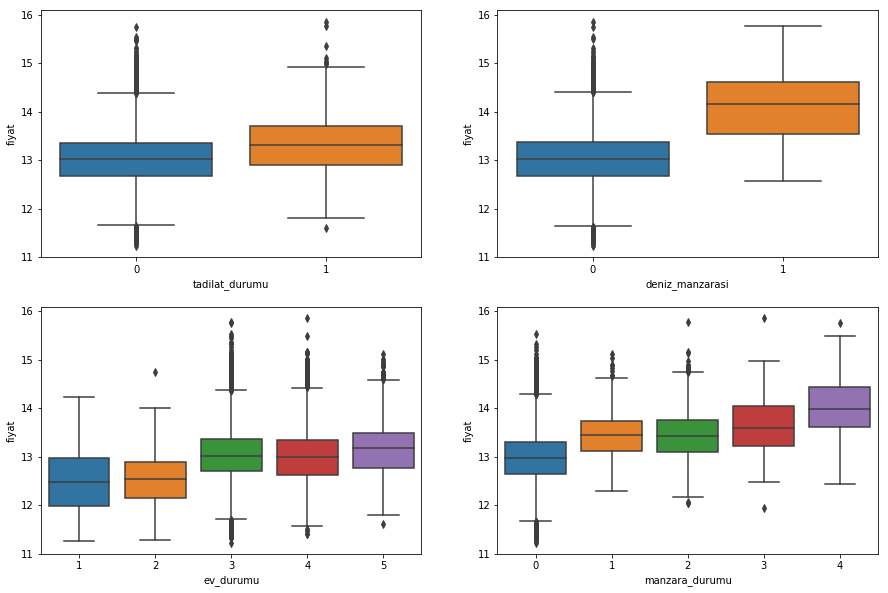

In [106]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.boxplot(x=data['deniz_manzarasi'],y=log_surekli['fiyat'])
plt.subplot(2,2,4)
sns.boxplot(x=data['manzara_durumu'],y=log_surekli['fiyat'])
plt.subplot(2,2,3)
sns.boxplot(x=data['ev_durumu'],y=log_surekli['fiyat'])
plt.subplot(2,2,1)
sns.boxplot(x=data['tadilat_durumu'],y=log_surekli['fiyat'])


from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data['net_m2']=sc.fit_transform(data['net_m2'])

In [107]:
data_w_dummy=pd.get_dummies(data,columns=['deniz_manzarasi','manzara_durumu','ev_durumu','tadilat_durumu'])

In [108]:
data_w_dummy

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,enlem,boylam,net_m2_2015,brut_m2_2015,deniz_manzarasi_0,deniz_manzarasi_1,manzara_durumu_0,manzara_durumu_1,manzara_durumu_2,manzara_durumu_3,manzara_durumu_4,ev_durumu_1,ev_durumu_2,ev_durumu_3,ev_durumu_4,ev_durumu_5,tadilat_durumu_0,tadilat_durumu_1
0,221900.0,3,1.00,1180,5650,1.0,7,1180,0,60,47.5112,-122.257,1340,5650,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,7,2170,400,64,47.7210,-122.319,1690,7639,1,0,1,0,0,0,0,0,0,1,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,6,770,0,82,47.7379,-122.233,2720,8062,1,0,1,0,0,0,0,0,0,1,0,0,1,0
3,604000.0,4,3.00,1960,5000,1.0,7,1050,910,50,47.5208,-122.393,1360,5000,1,0,1,0,0,0,0,0,0,0,0,1,1,0
4,510000.0,3,2.00,1680,8080,1.0,8,1680,0,28,47.6168,-122.045,1800,7503,1,0,1,0,0,0,0,0,0,1,0,0,1,0
5,1225000.0,4,4.50,5420,101930,1.0,11,3890,1530,14,47.6561,-122.005,4760,101930,1,0,1,0,0,0,0,0,0,1,0,0,1,0
6,257500.0,3,2.25,1715,6819,2.0,7,1715,0,20,47.3097,-122.327,2238,6819,1,0,1,0,0,0,0,0,0,1,0,0,1,0
7,291850.0,3,1.50,1060,9711,1.0,7,1060,0,52,47.4095,-122.315,1650,9711,1,0,1,0,0,0,0,0,0,1,0,0,1,0
8,229500.0,3,1.00,1780,7470,1.0,7,1050,730,55,47.5123,-122.337,1780,8113,1,0,1,0,0,0,0,0,0,1,0,0,1,0
9,323000.0,3,2.50,1890,6560,2.0,7,1890,0,12,47.3684,-122.031,2390,7570,1,0,1,0,0,0,0,0,0,1,0,0,1,0


In [109]:
data_w_dummy["fiyat"]=log_surekli["fiyat"]

In [110]:
data_w_dummy["net_m2"]=log_surekli["net_m2"]

In [111]:
data_w_dummy["ev_yasi"]=log_surekli["ev_yasi"]

In [112]:
data_w_dummy.to_excel("modified.xlsx")

In [113]:
data_w_dummy.iloc[:,[1,2,3,5,6,9,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]

,yatakodasi_sayisi,banyo_sayisi,net_m2,kat_sayisi,ev_puani,ev_yasi,net_m2_2015,brut_m2_2015,deniz_manzarasi_0,deniz_manzarasi_1,manzara_durumu_0,manzara_durumu_1,manzara_durumu_2,manzara_durumu_3,manzara_durumu_4,ev_durumu_1,ev_durumu_2,ev_durumu_3,ev_durumu_4,ev_durumu_5
0,3,1.00,7.074117,1.0,7,4.110874,1340,5650,1,0,1,0,0,0,0,0,0,1,0,0
1,3,2.25,7.852050,2.0,7,4.174387,1690,7639,1,0,1,0,0,0,0,0,0,1,0,0
2,2,1.00,6.647688,1.0,6,4.418841,2720,8062,1,0,1,0,0,0,0,0,0,1,0,0
3,4,3.00,7.581210,1.0,7,3.931826,1360,5000,1,0,1,0,0,0,0,0,0,0,0,1
4,3,2.00,7.427144,1.0,8,3.367296,1800,7503,1,0,1,0,0,0,0,0,0,1,0,0
5,4,4.50,8.598036,1.0,11,2.708050,4760,101930,1,0,1,0,0,0,0,0,0,1,0,0
6,3,2.25,7.447751,2.0,7,3.044522,2238,6819,1,0,1,0,0,0,0,0,0,1,0,0
7,3,1.50,6.966967,1.0,7,3.970292,1650,9711,1,0,1,0,0,0,0,0,0,1,0,0
8,3,1.00,7.484930,1.0,7,4.025352,1780,8113,1,0,1,0,0,0,0,0,0,1,0,0
9,3,2.50,7.544861,2.0,7,2.564949,2390,7570,1,0,1,0,0,0,0,0,0,1,0,0


# Multivariate Lineer Regression

In [114]:
import statsmodels.api as sm

In [115]:
x=data_w_dummy.iloc[:,[1,2,3,5,6,9,12,13,14,15,16,17,18,19,20,21,22,23,24,25]].values

In [116]:
x= sm.add_constant(x)

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
y=data_w_dummy["fiyat"]

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [120]:
from statsmodels.regression.linear_model import OLS

In [121]:
#model_f="fiyat ~ yatakodasi_sayisi +\ banyo_sayisi+\net_m2+\kat_sayisi+\ev_puani+\ev_yasi+\deniz_manzarasi_0+\deniz_manzarasi_1+\manzara_durumu_0+\manzara_durumu_1+\manzara_durumu_2+\manzara_durumu_3+\manzara_durumu_4+\ev_durumu_1+ev_durumu_2+ev_durumu_3+ev_durumu_4+ev_durumu_5+tadilat_durumu_0+\tadilat_durumu_1""fiyat ~ yatakodasi_sayisi +\ banyo_sayisi+\net_m2+\kat_sayisi+\ev_puani+\ev_yasi+\deniz_manzarasi_0+\deniz_manzarasi_1+\manzara_durumu_0+\manzara_durumu_1+\manzara_durumu_2+\manzara_durumu_3+\manzara_durumu_4+\ev_durumu_1+ev_durumu_2+ev_durumu_3+ev_durumu_4+ev_durumu_5+tadilat_durumu_0+\tadilat_durumu_1""fiyat ~ yatakodasi_sayisi +\ banyo_sayisi+\net_m2+\kat_sayisi+\ev_puani+\ev_yasi+\deniz_manzarasi_0+\deniz_manzarasi_1+\manzara_durumu_0+\manzara_durumu_1+\manzara_durumu_2+\manzara_durumu_3+\manzara_durumu_4+\ev_durumu_1+\ev_durumu_2+\ev_durumu_3+\ev_durumu_4+\ev_durumu_5+\tadilat_durumu_0+\tadilat_durumu_1"

In [122]:
lm=sm.regression.linear_model.OLS(y_train,x_train)

In [123]:
model=lm.fit()

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fiyat   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1641.
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        15:09:51   Log-Likelihood:                -5212.6
No. Observations:               17290   AIC:                         1.046e+04
Df Residuals:                   17272   BIC:                         1.060e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6080      0.043    108.124      0.000       4.524       4.692
x1            -0.0251      0.004     -7.117      0.000      -0.032      -0.018
x2             0.0530      0.006      9.338      0.000       0.042       0.064
x3             0.3145      0.013     24.472      0.000       0.289       0.340
x4             0.0946      0.006     15.587      0.000       0.083       0.106
x5             0.1903      0.004     51.140      0.000       0.183       0.198
x6             0.1176      0.004     31.832      0.000       0.110       0.125
x7          9.006e-05   5.86e-06     15.359      0.000    7.86e-05       0.000
x8         -6.274e-07   9.21e-08     -6.815      0.000   -8.08e-07   -4.47e-07
x9             2.1341      0.025     85.486      0.000       2.085       2.183
x10            2.4738      0.030     82.353      0.000       2.415       2.533
x11            0.7682      0.011     67.249      0.000       0.746       0.791
x12            0.9727      0.020     49.796      0.000       0.934       1.011
x13            0.8845      0.015     59.932      0.000       0.856       0.913
x14            0.9292      0.017     53.854      0.000       0.895       0.963
x15            1.0534      0.022     46.915      0.000       1.009       1.097
x16            0.8575      0.055     15.716      0.000       0.751       0.964
x17            0.8055      0.027     29.942      0.000       0.753       0.858
x18            0.9166      0.016     57.470      0.000       0.885       0.948
x19            0.9569      0.016     58.656      0.000       0.925       0.989
x20            1.0715      0.018     60.864      0.000       1.037       1.106
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                1.061
Skew:                          -0.015   Prob(JB):                        0.588
Kurtosis:                       2.975   Cond. No.                     3.86e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
pred=model.predict(x_test)
pred

array([12.81853809, 14.41674712, 12.80182118, ..., 12.76704098,
       12.4648018 , 12.82229839])

In [126]:
df=pd.DataFrame(y_test).reset_index(drop=True)
df["pred"]=pred

In [127]:
df=np.exp(df)


In [128]:
from sklearn.metrics import mean_squared_error

In [129]:
np.sqrt(mean_squared_error(df["fiyat"],df["pred"]))

203343.36286663832

In [130]:
def mape(y_true, y_predictions):
    return np.mean((np.abs(y_true-y_predictions))/y_true)*100

In [131]:
mape(df["fiyat"],df["pred"])

26.98103655250246

In [132]:
def med_ape(y_true, y_predictions):
    return np.median((np.abs(y_true-y_predictions))/y_true)*100

In [133]:
med_ape(df["fiyat"],df["pred"])

21.877011621392025

In [134]:
model_fitted_y=model.fittedvalues

In [135]:
model_residuals=model.resid

In [136]:
model_norm_residuals=model.get_influence().resid_studentized_internal

In [137]:
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

In [138]:
model_abs_resid = np.abs(model_residuals)

In [139]:
model_leverage = model.get_influence().hat_matrix_diag

In [140]:
model_cooks = model.get_influence().cooks_distance[0]

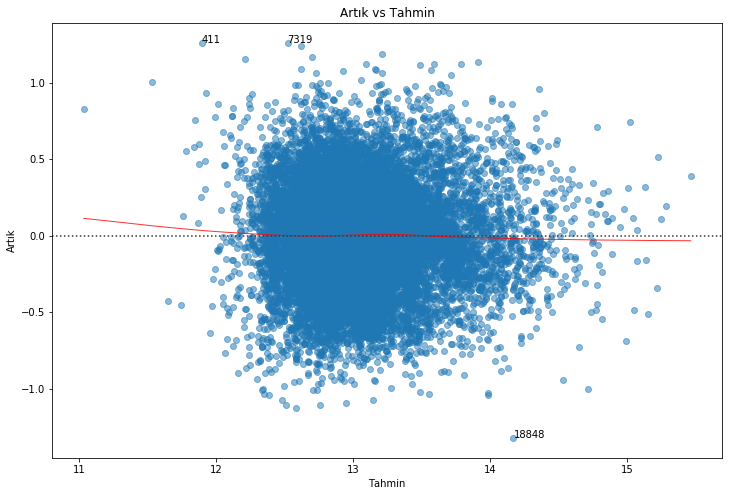

In [141]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0]=sns.residplot(model_fitted_y,model_residuals,data=data_w_dummy,lowess=True,scatter_kws={'alpha': 0.5},
                                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Artık vs Tahmin')
plot_lm_1.axes[0].set_xlabel('Tahmin')
plot_lm_1.axes[0].set_ylabel('Artık')

# annotations
abs_resid=model_abs_resid.sort_values(ascending=False)
abs_resid_top_3=abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i,xy =(model_fitted_y[i],model_residuals[i]));

Text(0, 0.5, '$\\sqrt{|Standartlaştırılmış Artıklar|}$')

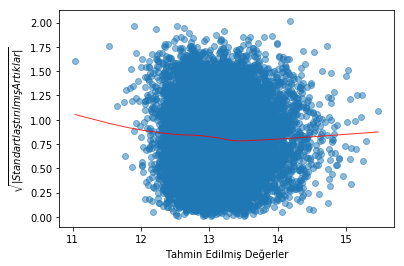

In [142]:
plot_lm_3 = plt.figure(1)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_xlabel('Tahmin Edilmiş Değerler')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standartlaştırılmış Artıklar|}$')

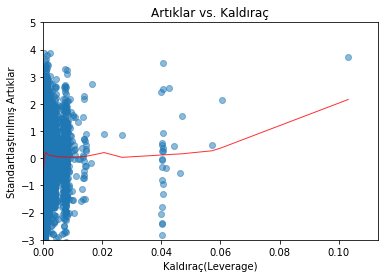

In [143]:
plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,scatter=False,ci=False,lowess=True,line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Artıklar vs. Kaldıraç')
plot_lm_4.axes[0].set_xlabel('Kaldıraç(Leverage)')
plot_lm_4.axes[0].set_ylabel('Standartlaştırılmış Artıklar');


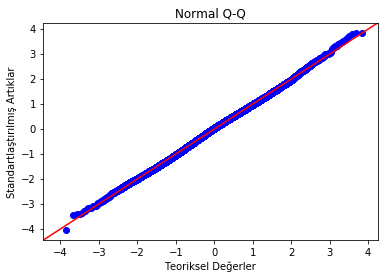

In [144]:
fig = sm.qqplot(model_norm_residuals, stats.t, fit=True, line='45')
fig.axes[0].set_title('Normal Q-Q')
fig.axes[0].set_xlabel('Teoriksel Değerler')
fig.axes[0].set_ylabel('Standartlaştırılmış Artıklar');

plt.show()

Hatayı bulurken ortalama kullanınca daha yüksek çıkıyor bu yüzden medyan kullanmak daha mantıklıdır.

pd.DataFrame(y1_test)

y1_test=pd.DataFrame(y1_test).reset_index(drop=True)
y1_test["pred"]=pred2
y1_test

plt.scatter(np.arange(0,len(y1_test),1),y1_test["fiyat"])
plt.plot(np.arange(0,len(y1_test),1),y1_test["pred"],color="red")
plt.xlim(200,250)

# Decision Tree Regression

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [146]:
dt_model=DecisionTreeRegressor(max_depth=5,random_state=0)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [147]:
from sklearn.metrics import mean_squared_error, r2_score
dt_model_score=dt_model.score(x_train,y_train)
dt_model_score

0.6310367001352268

In [148]:
y_tahmin=dt_model.predict(x_test)

In [149]:
df_dt=pd.DataFrame(y_test).reset_index(drop=True)
df_dt["pred"]=y_tahmin
df_dt=np.exp(df_dt)

In [150]:
#MSE
np.sqrt(mean_squared_error(df_dt["fiyat"],df_dt["pred"]))

209925.6407694128

In [151]:
#r2
r2_score(df_dt["fiyat"],df_dt["pred"])

0.6294383399361327

In [152]:
mape(df_dt["fiyat"],df_dt["pred"])

26.489307091828866

In [153]:
med_ape(df_dt["fiyat"],df_dt["pred"])

21.290263438450456

In [154]:
d=dt_model.feature_importances_

In [155]:
col=["yatakodasi_sayisi","banyo_sayisi","net_m2","kat_sayisi","ev_puani","ev_yasi","deniz_manzarasi_0","deniz_manzarasi_1","manzara_durumu_0","manzara_durumu_1","manzara_durumu_2","manzara_durumu_3","manzara_durumu_4","ev_durumu_1","ev_durumu_2","ev_durumu_3","ev_durumu_4","ev_durumu_5","tadilat_durumu_0","tadilat_durumu_1"]

In [156]:
import graphviz

In [157]:
import pydotplus

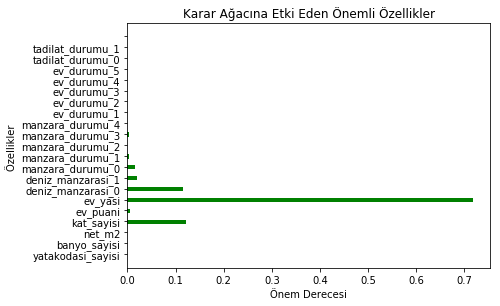

<Figure size 576x576 with 0 Axes>

In [158]:
fig, ax=plt.subplots() 
width=0.4 # the width of the bars 
ind=np.arange(len(d)) # the x locations for the groups
ax.barh(ind, d, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col,minor=False)
plt.title("Karar Ağacına Etki Eden Önemli Özellikler")
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellikler ") 
plt.figure(figsize=(8,8))
fig.set_size_inches(6.5, 4.5, forward=True)

(2500, 2600)

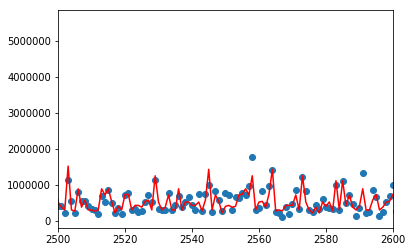

In [204]:
plt.scatter(np.arange(0,len(df_dt),1),df_dt["fiyat"])
plt.plot(np.arange(0,len(df_dt),1),df_dt["pred"],color="red")
plt.xlim(2500,2600)

In [ ]:
#Önce graphviz sonra pydotpllus ı kurup dene 

In [ ]:
# import export_graphviz 
from sklearn.tree import export_graphviz  
  
# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(dt_model, out_file ='tree.dot', 
               feature_names = col)  

In [ ]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(dt_model, filled=True, rounded=True,
    feature_names=col,out_file=None)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('tree.png')                           # Write graph to PNG image

# Random Forest

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=0)

In [162]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [163]:
y_tahmin_rf=rf_model.predict(x_test)

In [164]:
df_rf=pd.DataFrame(y_test).reset_index(drop=True)
df_rf["pred"]=y_tahmin_rf
df_rf=np.exp(df_rf)

In [165]:
#MSE
np.sqrt(mean_squared_error(df_rf['fiyat'],df_rf['pred']))

176354.13942379176

In [166]:
#r2
r2_score(df_rf['fiyat'],df_rf['pred'])

0.7384824588299354

In [167]:
mape(df_rf['fiyat'],df_rf['pred'])

22.024927111951715

In [168]:
med_ape(df_rf['fiyat'],df_rf['pred'])

17.046709188439824

In [169]:
a=rf_model.feature_importances_
a

array([0.        , 0.01341865, 0.0225214 , 0.18374702, 0.00872159,
       0.42848147, 0.12838255, 0.0897061 , 0.09165066, 0.00268915,
       0.00255074, 0.00449388, 0.00110833, 0.00162732, 0.00113817,
       0.00395887, 0.00062252, 0.00168577, 0.00573497, 0.00447931,
       0.00328153])

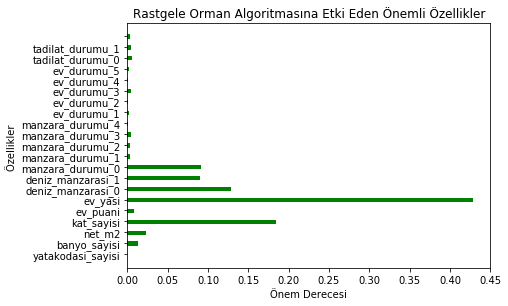

<Figure size 720x720 with 0 Axes>

In [170]:
fig, ax=plt.subplots() 
width=0.4 # the width of the bars 
ind=np.arange(len(a)) # the x locations for the groups
ax.barh(ind, a, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col,minor=False)
plt.title("Rastgele Orman Algoritmasına Etki Eden Önemli Özellikler")
plt.xlabel("Önem Derecesi")
plt.ylabel("Özellikler ")
plt.figure(figsize=(10,10))
fig.set_size_inches(6.5, 4.5, forward=True)

(1800, 1900)

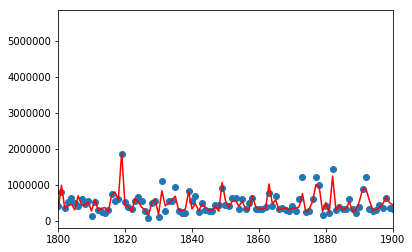

In [171]:
plt.scatter(np.arange(0,len(df_rf),1),df_rf["fiyat"])
plt.plot(np.arange(0,len(df_rf),1),df_rf["pred"],color="red")
plt.xlim(1800,1900)

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbm_model=GradientBoostingRegressor()
gbm_model.fit(x_train,y_train)

In [ ]:
y_tahmin_gbm=gbm_model.predict(x_test)

In [ ]:
df_gbm=pd.DataFrame(y_test).reset_index(drop=True)
df_gbm["pred"]=y_tahmin_gbm
df_gbm=np.exp(df_gbm)

In [ ]:
#MSE
np.sqrt(mean_squared_error(df_gbm["fiyat"],df_gbm["pred"]))

In [ ]:
#r2
r2_score(df_gbm["fiyat"],df_gbm["pred"])

In [ ]:
gbm=gbm_model.feature_importances_

In [ ]:
fig, ax=plt.subplots() 
width=0.4 # the width of the bars 
ind=np.arange(len(gbm)) # the x locations for the groups
ax.barh(ind,gbm, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col,minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(10,10))
fig.set_size_inches(6.5, 4.5, forward=True)

In [ ]:
mape(df_gbm["fiyat"],df_gbm["pred"])

In [ ]:
med_ape(df_gbm["fiyat"],df_gbm["pred"])

In [ ]:
ytest1=pd.DataFrame(y_test).reset_index(drop=True)
ytest1["pred"]=y_tahmin_gbm
ytest1[20:40].plot()

# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model=XGBRegressor()

In [ ]:
xgb_model.fit(x_train,y_train)

In [ ]:
y_tahmin_xgb=xgb_model.predict(x_test)

In [ ]:
df_xgb=pd.DataFrame(y_test).reset_index(drop=True)
df_xgb["pred"]=y_tahmin_xgb
df_xgb=np.exp(df_xgb)

In [ ]:
#MSE
np.sqrt(mean_squared_error(df_xgb["fiyat"],df_xgb["pred"]))

In [ ]:
r2_score(df_xgb["fiyat"],df_xgb["pred"])

In [ ]:
xgb=xgb_model.feature_importances_

In [ ]:
fig, ax=plt.subplots() 
width=0.4 # the width of the bars 
ind=np.arange(len(xgb)) # the x locations for the groups
ax.barh(ind,xgb, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col,minor=False)
plt.title("Feature importance in XGBoost")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(10,10))
fig.set_size_inches(6.5, 4.5, forward=True)

In [ ]:
mape(df_xgb["fiyat"],df_xgb["pred"])

In [ ]:
med_ape(df_xgb["fiyat"],df_xgb["pred"])

# Aykırı Değerler

In [173]:
aykiri_fiyat=data["fiyat"].copy()

In [174]:
aykiri_fiyat.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: fiyat, dtype: float64

In [175]:
Q1_fiyat=aykiri_fiyat.quantile(0.25)
Q3_fiyat=aykiri_fiyat.quantile(0.75)
IQR=Q3_fiyat-Q1_fiyat

In [176]:
alt_sinir=Q1_fiyat-3*IQR
alt_sinir

-647200.0

In [177]:
ust_sinir=Q3_fiyat+3*IQR
ust_sinir

1614150.0

In [178]:
aykiri_ust=aykiri_fiyat > (ust_sinir)
aykiri_ust

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
21597    False
21598    False
21599    False
21600    False
21601    False
21602    False
21603    False
21604    False
21605    False
21606    False
21607    False
21608    False
21609    False
21610    False
21611    False
21612    False
Name: fiyat, Length: 21613, dtype: bool

In [179]:
aykirilar=aykiri_fiyat[aykiri_ust]
aykirilar.count()

420

In [180]:
wout=data[data["fiyat"]<ust_sinir].reset_index(drop=True)

In [181]:
wout

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,14,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,20,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,52,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,55,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,12,0,47.3684,-122.031,2390,7570


In [182]:
aykiri_netm2=data["net_m2"].copy()

In [183]:
Q1_netm2=aykiri_netm2.quantile(0.25)
Q3_netm2=aykiri_netm2.quantile(0.75)
IQR=Q3_netm2-Q1_netm2

In [184]:
alt_sinir=Q1_netm2-3*IQR
alt_sinir

-1942.0

In [185]:
ust_sinir=Q3_netm2+3*IQR
ust_sinir

5919.0

In [186]:
aykiri_ust=data["net_m2"] > (ust_sinir)
aykiri_ust

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
21583    False
21584    False
21585    False
21586    False
21587    False
21588    False
21589    False
21590    False
21591    False
21592    False
21593    False
21594    False
21595    False
21596    False
21597    False
21598    False
21599    False
21600    False
21601    False
21602    False
21603    False
21604    False
21605    False
21606    False
21607    False
21608    False
21609    False
21610    False
21611    False
21612    False
Name: net_m2, Length: 21613, dtype: bool

In [187]:
aykiri_netm2[aykiri_ust].count()

74

In [191]:
wout=data[data["net_m2"]<ust_sinir].reset_index(drop=True)

In [192]:
wout.count()

fiyat                21539
yatakodasi_sayisi    21539
banyo_sayisi         21539
net_m2               21539
brut_m2              21539
kat_sayisi           21539
deniz_manzarasi      21539
manzara_durumu       21539
ev_durumu            21539
ev_puani             21539
zemin_ustu_m2        21539
zemin_alti_m2        21539
ev_yasi              21539
tadilat_durumu       21539
enlem                21539
boylam               21539
net_m2_2015          21539
brut_m2_2015         21539
dtype: int64

In [190]:
data

,fiyat,yatakodasi_sayisi,banyo_sayisi,net_m2,brut_m2,kat_sayisi,deniz_manzarasi,manzara_durumu,ev_durumu,ev_puani,zemin_ustu_m2,zemin_alti_m2,ev_yasi,tadilat_durumu,enlem,boylam,net_m2_2015,brut_m2_2015
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,60,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,64,1,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,50,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,14,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,20,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,52,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,55,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,12,0,47.3684,-122.031,2390,7570
